Problem Statement:

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
df=df.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score': 'Happiness_Score','Standard Error':'Error','Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'})

In [11]:
df.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Error', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

# About the columns

1.Country:
    This column shows the list of 158 country names.

2.Region:
    This column shows the region of the countries.
    
3.Rank:
     It shows the rank of the countries which is based on Happiness_Score.
     
4.Happiness_Score:
     It provides the score of happiness of countries.
    
5.Error:
     It shows the standard error.
     
6.Economy:
    This column shows the GDP per capita.
    
7.Family:
    The details of the family is shown in Family column.
    
8.Health:
    The life expectancy is determined using this.
    
9.Freedom:
    It shows the details about the freedom of people.
    
10.Trust:
    This column shows the details about government corruption.
    
11.Generosity:
      This column shows the quality of generous.
      
12.Dystopia_Residual:
      The details of dystopia is provided in this column.
     

In [12]:
df.isnull().sum()

Country              0
Region               0
Rank                 0
Happiness_Score      0
Error                0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

# EDA

# Scatterplot:

<AxesSubplot:xlabel='Country', ylabel='Happiness_Score'>

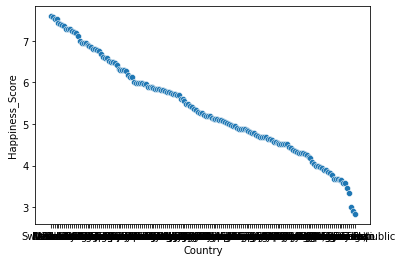

In [13]:
import seaborn as sns
sns.scatterplot(x="Country",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Region', ylabel='Happiness_Score'>

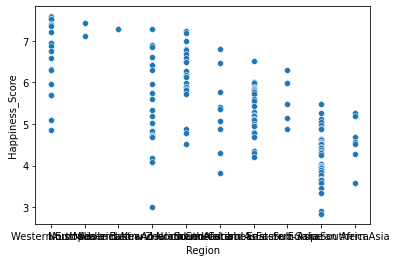

In [15]:
sns.scatterplot(x="Region",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Rank', ylabel='Happiness_Score'>

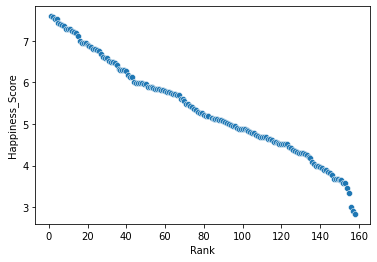

In [19]:
sns.scatterplot(x="Rank",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Error', ylabel='Happiness_Score'>

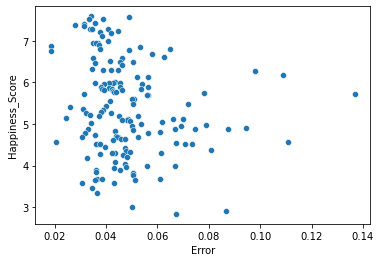

In [20]:
sns.scatterplot(x="Error",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Economy', ylabel='Happiness_Score'>

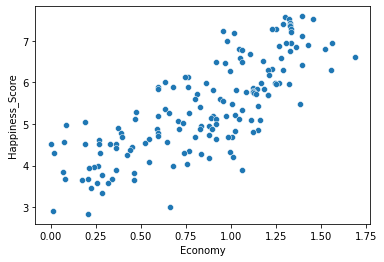

In [21]:
sns.scatterplot(x="Economy",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness_Score'>

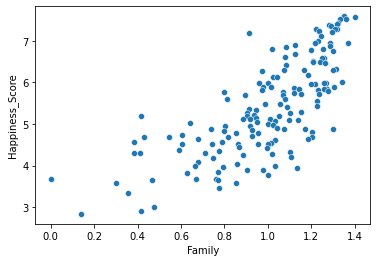

In [22]:
sns.scatterplot(x="Family",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Health', ylabel='Happiness_Score'>

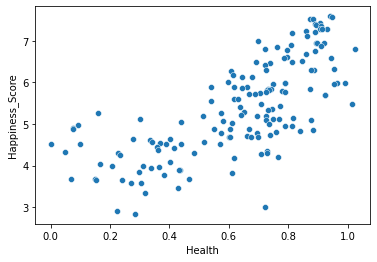

In [23]:
sns.scatterplot(x="Health",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness_Score'>

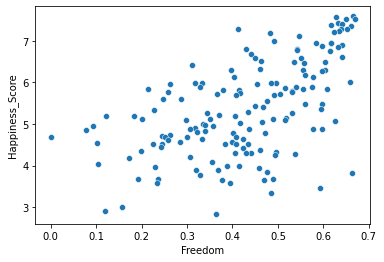

In [24]:
sns.scatterplot(x="Freedom",y="Happiness_Score",data=df)

<AxesSubplot:xlabel='Trust', ylabel='Happiness_Score'>

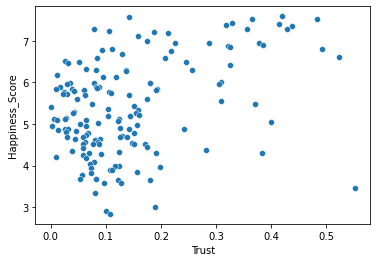

In [25]:
sns.scatterplot(x="Trust",y="Happiness_Score",data=df)

(<AxesSubplot:xlabel='Generosity', ylabel='Happiness_Score'>,)

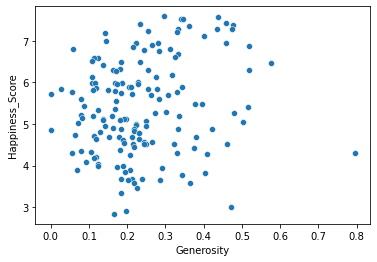

In [26]:
sns.scatterplot(x="Generosity",y="Happiness_Score",data=df),

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Happiness_Score'>

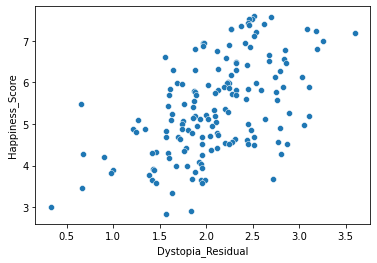

In [27]:
sns.scatterplot(x="Dystopia_Residual",y="Happiness_Score",data=df)

# Correlation:

In [28]:
df.corr()

,Rank,Happiness_Score,Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Correlation using Heatmap:

<AxesSubplot:>

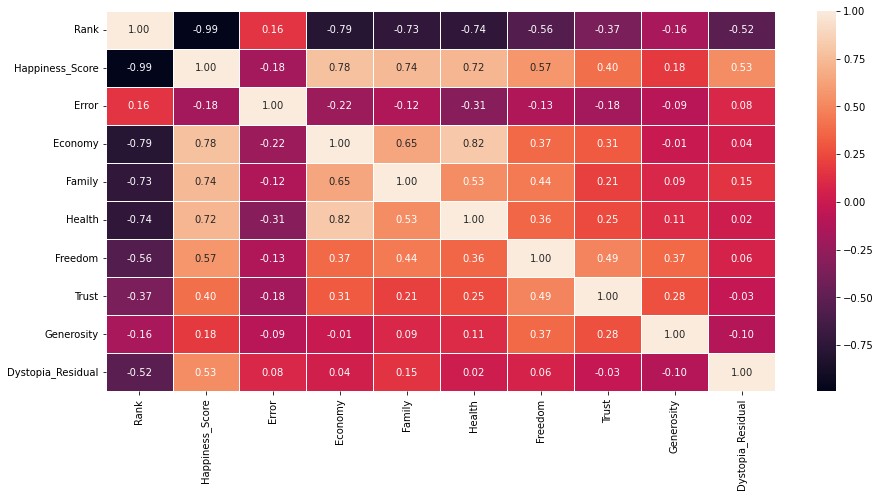

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Outcome of Correlation:

Except standard error column all other columns are positively correlated with target column.

Economy with 78 percent,Family with 74 percent and Health with 72 percent correlated with the target column which can be considered as a strong bond.Other columns are also having good correlation except standard_error.

# Describing Datasets:

In [31]:
df.describe()

,Rank,Happiness_Score,Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


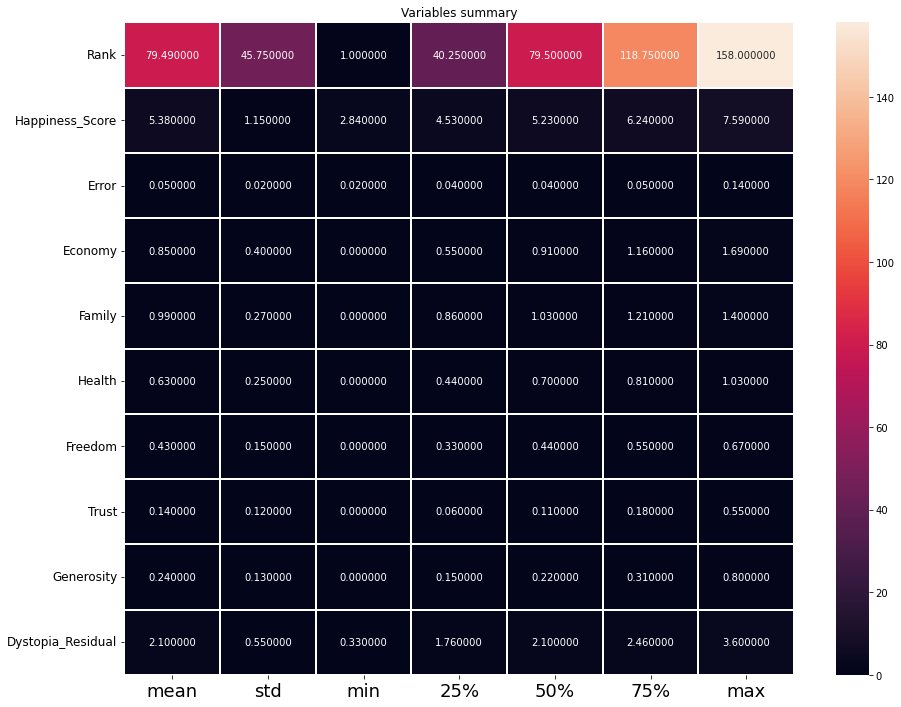

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Outcome of describe of datasets:

From the above plotting we are determining mean,stadard deviation,minimum and maximum value of each column.It helps us further in data cleaning.

Total No.of rows in the dataset:

158

Total No.of columns in the dataset:

12

Rank:


1.Mean = 79.493671

2.std = 45.754363

3.max_value = 158.000000

4.min_value = 1.000000

Happiness_Score:


1.Mean = 5.375734

2.std = 1.145010

3.max_value = 7.587000

4.min_value = 2.839000

Error:


1.Mean = 0.047885

2.std = 0.017146

3.max_value = 0.136930

4.min_value = 0.018480

Economy:


1.Mean = 0.846137

2.std = 0.403121

3.max_value = 1.690420

4.min_value = 0.000000

Family:


1.Mean = 0.991046

2.std = 0.272369

3.max_value = 1.402230

4.min_value = 0.000000

Health:


1.Mean = 0.630259

2.std = 0.247078

3.max_value = 1.025250

4.min_value = 0.000000

Freedom:


1.Mean = 0.428615

2.std = 0.150693

3.max_value = 0.669730

4.min_value = 0.000000

Trust:


1.Mean = 0.143422

2.std = 0.120034

3.max_value = 0.551910

4.min_value = 0.000000

Generosity:


1.Mean = 0.237296

2.std = 0.126685

3.max_value = 0.795880

4.min_value = 0.000000

Dystopia_Residual:


1.Mean = 2.098977

2.std = 0.553550

3.max_value = 3.602140

4.min_value = 0.328580




In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Rank               158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Error              158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


From the above code we can have the columns datatype and memory used by the dataframe.

# Outliers Checking:

<AxesSubplot:>

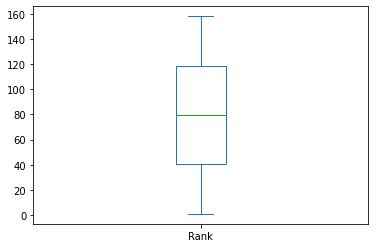

In [39]:
df['Rank'].plot.box()

We can see no outliers in this column

<AxesSubplot:>

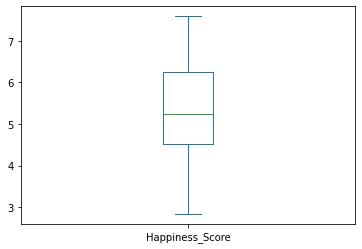

In [45]:
df['Happiness_Score'].plot.box()

No outliers are present in this column.

<AxesSubplot:>

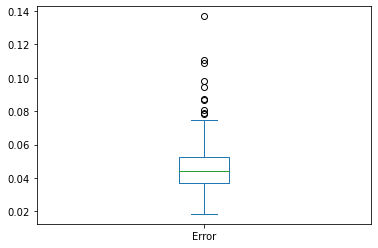

In [46]:
df['Error'].plot.box()

From above boxplot we can say that 'error' column have outliers.

<AxesSubplot:>

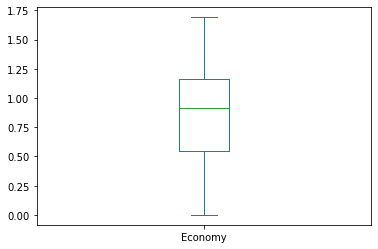

In [47]:
df['Economy'].plot.box()

No outliers are present in Economy column.

<AxesSubplot:>

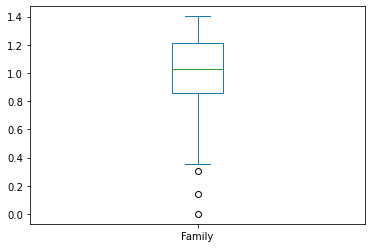

In [48]:
df['Family'].plot.box()

From above boxplot we can observe that the family column also have some outliers

<AxesSubplot:>

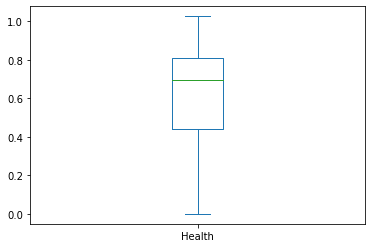

In [49]:
df['Health'].plot.box()

<AxesSubplot:>

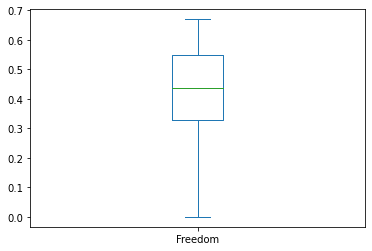

In [50]:
df['Freedom'].plot.box()

<AxesSubplot:>

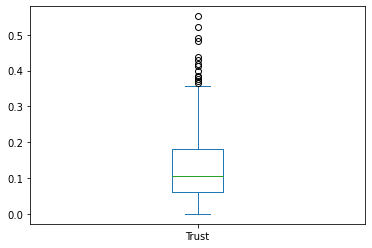

In [51]:
df['Trust'].plot.box()

above trust column also have some outliers

<AxesSubplot:>

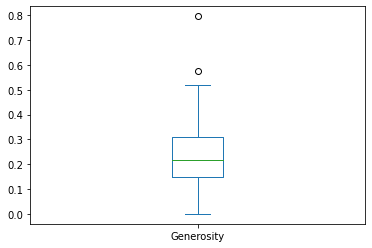

In [52]:
df['Generosity'].plot.box()

The Genorosity column also have some outliers

<AxesSubplot:>

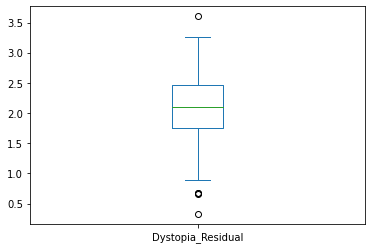

In [54]:
df['Dystopia_Residual'].plot.box()

# Skewness:

In [58]:
df.skew()

Rank                 0.000418
Happiness_Score      0.097769
Error                1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia_Residual   -0.238911
dtype: float64

Outcome of Skewness:

    Skewness threshold is taken as +/-0.5.The columns which are having skewness are
    Error,Family,Health,Trust,Generosity

# Normal Distribution Curve:

<AxesSubplot:xlabel='Rank', ylabel='Density'>

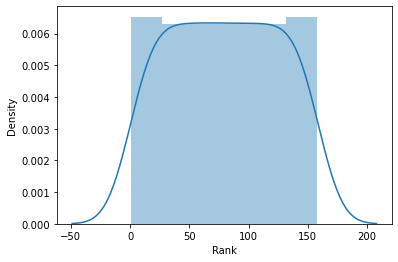

In [61]:
sns.distplot(df["Rank"])

The above data is not normalized,the building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Happiness_Score', ylabel='Density'>

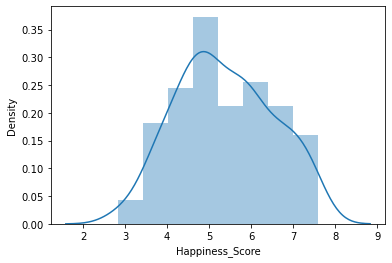

In [62]:
sns.distplot(df["Happiness_Score"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Error', ylabel='Density'>

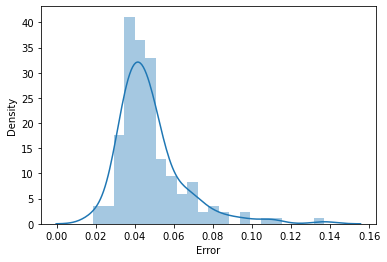

In [63]:
sns.distplot(df["Error"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Economy', ylabel='Density'>

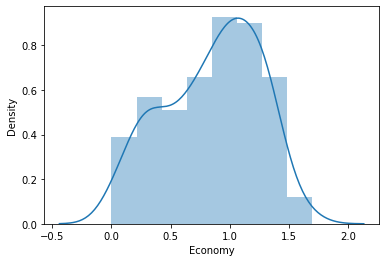

In [65]:
sns.distplot(df["Economy"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Family', ylabel='Density'>

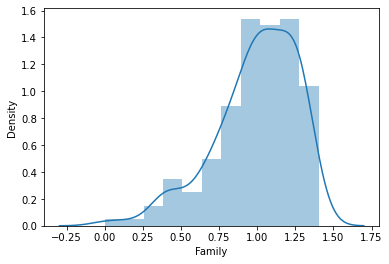

In [66]:
sns.distplot(df["Family"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Health', ylabel='Density'>

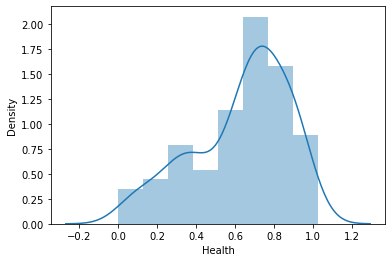

In [67]:
sns.distplot(df["Health"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

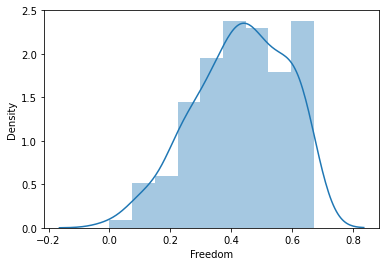

In [68]:
sns.distplot(df["Freedom"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Trust', ylabel='Density'>

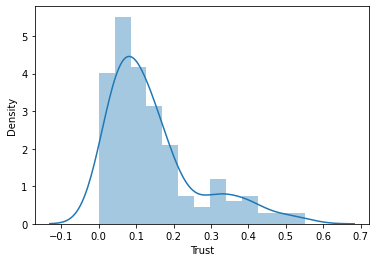

In [69]:
sns.distplot(df["Trust"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

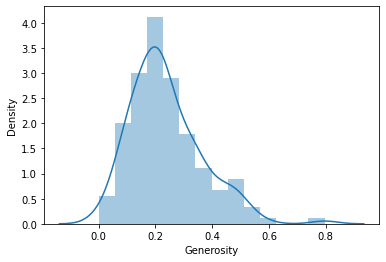

In [70]:
sns.distplot(df["Generosity"])

The above data is not normalized,the building blocks are out of the normalized curve

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Density'>

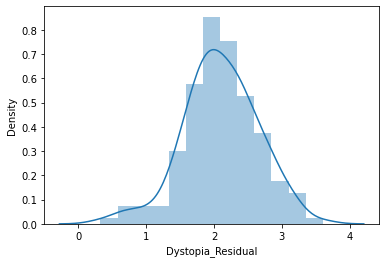

In [72]:
sns.distplot(df["Dystopia_Residual"])

The above data is not normalized,the building blocks are out of the normalized curve

# Data Cleaning:

In [75]:
df1=df.drop(['Country','Region','Error'],axis=1)
df1

,Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers:

Z-score Technique

In [76]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(158, 9)

In [77]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([6, 7, 3, 6, 8, 3], dtype=int64))


In [78]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(158, 9)
(152, 9)


# Percentage Data Loss:

In [79]:
loss_percent=(158-152)/158*100
loss_percent

3.79746835443038

In [93]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [94]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.06118488,  1.8387073 ,  1.49611068, ...,  1.76230969,
         1.8220699 ,  0.65595135],
       [-2.00536253,  1.81883275,  1.19771756, ...,  1.44688503,
         0.35523024,  1.57166845],
       [-1.95460445,  1.79278922,  1.27024568, ...,  1.6221701 ,
         1.95457489,  0.97742359],
       ...,
       [ 1.5407485 , -1.79965538, -1.35114936, ..., -1.27152318,
        -0.16357633,  1.13659521],
       [ 1.57594638, -2.06377822, -1.4183337 , ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [ 1.61101853, -2.57588281, -1.91827051, ..., -1.85450203,
        -0.11827784, -0.18319784]])

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.06118488,  1.8387073 ,  1.49611068, ...,  1.76230969,
         1.8220699 ,  0.65595135],
       [-2.00536253,  1.81883275,  1.19771756, ...,  1.44688503,
         0.35523024,  1.57166845],
       [-1.95460445,  1.79278922,  1.27024568, ...,  1.6221701 ,
         1.95457489,  0.97742359],
       ...,
       [ 1.5407485 , -1.79965538, -1.35114936, ..., -1.27152318,
        -0.16357633,  1.13659521],
       [ 1.57594638, -2.06377822, -1.4183337 , ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [ 1.61101853, -2.57588281, -1.91827051, ..., -1.85450203,
        -0.11827784, -0.18319784]])

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [110]:
lr=LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state",i)
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 12 The model performs very well
At random state 12
Training r2_score is: 96.86926136348974
Testing r2_score is: 96.9262882415719
At random state 17 The model performs very well
At random state 17
Training r2_score is: 96.86314495121638
Testing r2_score is: 96.90604931706179
At random state 106 The model performs very well
At random state 106
Training r2_score is: 96.92312388035266
Testing r2_score is: 96.92022203710914
At random state 141 The model performs very well
At random state 141
Training r2_score is: 96.83738879598219
Testing r2_score is: 96.81027554814385
At random state 208 The model performs very well
At random state 208
Training r2_score is: 96.87637464094199
Testing r2_score is: 96.92324543938753
At random state 227 The model performs very well
At random state 227
Training r2_score is: 96.89918243596199
Testing r2_score is: 96.85307518336113
At random state 257 The model performs very well
At random state 257
Training r2_score is: 96.88767061887451
Testing 

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=106)

# Cross validation score for linear regression:

In [112]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred_lr)
for j in range(2,10):
    lsscore =cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:",j)
    print("cross validation score: ",lsc*100)
    print("r2_score: ",lss*100)
    print("\n")

At cv: 2
cross validation score:  39.93117329133066
r2_score:  97.09730303584873


At cv: 3
cross validation score:  77.37509445539598
r2_score:  97.09730303584873


At cv: 4
cross validation score:  82.42018262599542
r2_score:  97.09730303584873


At cv: 5
cross validation score:  81.70204858348369
r2_score:  97.09730303584873


At cv: 6
cross validation score:  86.21164822919677
r2_score:  97.09730303584873


At cv: 7
cross validation score:  86.31800074008085
r2_score:  97.09730303584873


At cv: 8
cross validation score:  86.76334048073416
r2_score:  97.09730303584873


At cv: 9
cross validation score:  91.21583072367946
r2_score:  97.09730303584873




In [113]:
lsscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is:",lss)

The cv score is:  0.8242018262599542 
The accuracy score is: 0.9709730303584873


# Model Saving:

In [116]:
import pickle
filename= 'WHR-Model.pkl'
pickle.dump(lr,open(filename,'wb'))